# **Machine Learning and Statistics Project**

***

Author: Roberto Vergano

**Python modules required**

In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display, Math
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

**Table of contents**
1. Project goal.
2. Supervised learning.
3. Classification algorithms.
4. Practical implementation.
5. Conclusion.
6. References.

### **1. Project Goal**
***

The goal of this project is to develop a comprehensive notebook that delves into the application of classification algorithms on the Iris flower dataset, originally compiled by Ronald A. Fisher. It begins by introducing the concept of supervised learning, followed by an explanation of what classification algorithms entail. The notebook will feature a practical implementation of one prevalent classification algorithm using the scikit-learn library in Python. Throughout, the notebook will incorporate various visual aids such as plots, mathematical symbols, and diagrams to effectively elucidate the underlying concepts. This approach aims to provide a clear, instructive, and visually engaging exploration of classification algorithms in the context of a well-known dataset.

### **2. Supervised Learning**
***

**What is supervised learning?**

Supervised learning, a key branch of machine learning and artificial intelligence, involves training algorithms using labeled datasets to accurately classify data or predict outcomes. In this process, the algorithm continually adjusts its parameters during training, using input data to improve accuracy, guided by cross-validation. This technique is widely employed in various real-world applications, such as email spam filtering.(1)

The core of supervised learning lies in its use of a training dataset, which includes both input data and correct outputs. This allows the model to incrementally learn and improve. The model's performance is evaluated using a loss function, which measures accuracy and guides the adjustments until minimal error is achieved.(1)

Supervised learning addresses two main types of problems in data mining: classification and regression. Classification involves categorizing test data into specific groups, using algorithms like linear classifiers, support vector machines (SVM), decision trees, k-nearest neighbors, and random forests. These algorithms help in identifying and labeling different entities within a dataset. On the other hand, regression focuses on understanding the relationships between dependent and independent variables. It's often used in forecasting scenarios, like projecting sales revenue, with popular methods including linear regression, logistical regression, and polynomial regression. Both classification and regression provide powerful tools for data analysis and prediction in various fields.(1)

<center>
    <h4> Figure 1. Supervised learning </h4>
    <img src="Images/supervisedlearning.png" width="500" height="340">
</center>


**What are the steps involved in supervised learning?**

The steps involved in supervised learning are:

- Determine the training dataset.
- Collection of labeled training data.
- Splitting the data into a train-test dataset.
- Identify the input characteristics of the training dataset.
- Select a suitable algorithm 
- Evaluate the model performance based on evaluation matrices.(2)

**What are the advanges and disadvantages of the supervised learning?**

Advantages:

- Explicit Feedback: Supervised learning models benefit from labeled data, providing clear feedback for training and improvement.
- Predictive Accuracy: When trained with high-quality, representative data, these models excel in accuracy, particularly in classification and regression tasks.
- Generalization: Effective supervised models can apply their learned knowledge to accurately predict outcomes for new, unseen data, making them practical for real-world scenarios.
- Interpretability: Algorithms like linear regression and decision trees offer interpretable models, allowing users to understand how inputs affect predictions.
- Wide Application Range: Supervised learning is versatile, applicable across fields like healthcare, finance, natural language processing, and computer vision.
- Resource Availability: There's a wealth of tools and libraries (e.g., scikit-learn, TensorFlow, PyTorch) available for implementing supervised learning algorithms.(3)

Disadvantages:

- Data Labeling Requirement: Acquiring labeled data can be costly and time-intensive, particularly for large datasets.
- Limitation to Labeled Data: These models are generally restricted to making predictions on data types similar to those they were trained on.
- Bias and Noise in Labels: Biases or errors in labeled data can lead the model to learn and replicate these inaccuracies.
- Overfitting Risk: Models might overfit to training data, capturing noise instead of underlying patterns. Regularization is often needed to address this.
- Feature Engineering Necessity: Effective model performance relies heavily on appropriate feature selection and engineering.
- Scalability Challenges: Training complex models on large datasets can be computationally demanding and resource-intensive.
- Constrained by Data Distribution: Performance may degrade when faced with data distributions different from the training set.
- Privacy Concerns: Use of labeled data in certain contexts may pose privacy risks, particularly if sensitive information is involved.
- Imbalanced Data Issues: Supervised models may have difficulty accurately predicting outcomes for minority classes in imbalanced datasets.
- Concept Drift: As relationships between features and targets evolve, models may need regular updates or retraining to stay effective.(3)

### **3. Classification Algorithms**
***

In supervised learning, classification algorithms are used to categorize data into predefined classes or categories. These algorithms learn from labeled training data and then use this learning to classify new, unseen data. Some of the most used are the ones presented below.

**Logistic Regression**

Logistic regression operates by analyzing the relationship between independent variables and a dependent binary variable, making it an effective tool for decision-making processes like determining if an email is spam. The algorithm employs a logistic or sigmoid function, which takes independent variables as input and outputs a probability value ranging between 0 and 1. In classification, if the probability exceeds a threshold value, typically 0.5, the instance is classified into one category (Class 1), otherwise, it falls into the other category (Class 0). Although it shares the term 'regression' with linear regression and extends from it, logistic regression differs significantly as it predicts the probability of an instance belonging to a particular class, rather than producing a continuous output value.(4)

The key characteristics of logistic regression include:

- Output as Categorical Data: It predicts the output of a categorical dependent variable, meaning the outcome is discrete such as Yes or No, 0 or 1, True or False.

- Probabilistic Nature: Instead of providing a definitive value like 0 or 1, logistic regression offers probabilistic values that lie between 0 and 1.

- Difference from Linear Regression: Although similar to linear regression in some aspects, logistic regression is distinctively used for classification problems, whereas linear regression is utilized for regression problems.

- Fitting an 'S' Shaped Curve: Logistic regression fits an S-shaped logistic function, rather than a straight line. This function is capable of predicting two maximum values (0 or 1), which is suitable for binary classification.

- Applications in Predicting Likelihoods: The curve of the logistic function can indicate the likelihood of various outcomes, such as determining whether cells are cancerous or predicting obesity in mice based on weight.

- Versatility and Effectiveness: Logistic regression is significant in machine learning for its ability to provide probabilities and classify new data, working well with both continuous and discrete datasets.

- Useful in Various Classifications: It can be employed to classify observations using different types of data and is effective in identifying the most influential variables for classification.(4)

The sigmoid or logistic function in logistic regression maps any real value to a probability between 0 and 1, creating an S-shaped curve (Figure 2). It uses a threshold value to classify outcomes: values above the threshold are classified as 1, and those below as 0.(4,5)

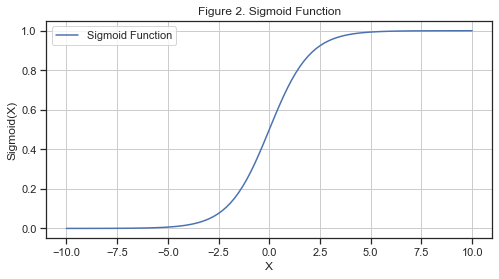

In [69]:
# Sigmoid function 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Range of values from -10 to 10
x = np.linspace(-10, 10, 100)

# Apply the sigmoid function to these values
y = sigmoid(x)

# Plotting 
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Sigmoid Function")
plt.title("Figure 2. Sigmoid Function")
plt.xlabel("X")
plt.ylabel("Sigmoid(X)")
plt.grid(True)
plt.legend()
plt.show()

**Decission Trees**

A decision tree is a versatile, non-parametric algorithm used in supervised learning for both classification and regression tasks. It features a hierarchical structure with a root node, branches, internal nodes (decision nodes), and leaf nodes (terminal nodes)(Figure 3), where decisions are made and outcomes represented.(6)

<center>
    <h4> Figure 3. Decision tree </h4>
    <img src="Images\decision-tree-classification-algorithm.png" width="500" height="340">
</center>

The algorithm uses a divide-and-conquer strategy, performing a search to find optimal split points in the tree. It splits data recursively from the top down until records are classified under specific labels. The complexity of the tree affects its ability to achieve homogenous leaf nodes, with smaller trees often achieving purer nodes. However, larger trees may struggle with data fragmentation and overfitting.(6)

To address overfitting and maintain simplicity, decision trees adhere to Occam’s Razor principle, favoring smaller trees and adding complexity only when necessary. Pruning, which involves removing less important branches, is a method used to reduce complexity. The tree's performance is often assessed through cross-validation.(6)

For enhanced accuracy, decision trees can be part of an ensemble, like in a random forest algorithm. This approach combines multiple trees, improving prediction accuracy, especially when individual trees are uncorrelated.(6)

**Random Forest**

A Random Forest is an ensemble machine learning algorithm that combines multiple decision trees to improve prediction accuracy and reduce the risk of overfitting. It operates by creating a 'forest' of decision trees (Figure 4), each trained on a random subset of the data and features. When making predictions, each tree in the forest votes, and the most common prediction (in classification tasks) or the average prediction (in regression tasks) becomes the output of the Random Forest.(7)

<center>
    <h4> Figure 4. Random Forest </h4>
    <img src="Images\randomforest1.png" width="500" height="340">
</center>

This method capitalizes on the strengths of individual decision trees while mitigating their tendency to overfit by averaging their results, thus providing more reliable and robust predictions. Random Forests are versatile, able to handle both classification and regression tasks, and perform well on many types of datasets.(7)

**K-Nearest Neighbors**

The K-Nearest Neighbors (KNN) algorithm is a non-parametric, supervised learning algorithm primarily used for classification, though it can also be used for regression. It operates on the principle that similar data points are often close to each other. In classification tasks, KNN assigns a class label based on the most common label among the nearest neighbors of a data point (Figure 5). This process is often referred to as "majority voting," although, in the strict sense, it's more accurately described as "plurality voting." This distinction is important in scenarios with multiple classes, where the winning label might not have over 50% of the votes but is the most frequent label in the nearest neighbors. For instance, in a four-category classification, a class could be assigned with more than 25% of the votes among the nearest neighbors.(8)


<center>
    <h4> Figure 5. K-Nearest Neighbors </h4>
    <img src="Images\KNN.png" width="500" height="340">
</center>

In regression problems using the K-Nearest Neighbors (KNN) algorithm, the concept is similar to classification, but instead of voting, the algorithm predicts a continuous value by averaging the values of the k nearest neighbors. This highlights the main difference between classification and regression: classification predicts discrete labels, while regression predicts continuous values.(8)

An essential aspect of KNN is defining the distance between data points, with Euclidean distance being the most commonly used metric. Additionally, KNN is categorized as a "lazy learning" model, meaning it doesn't go through a conventional training phase but rather stores the training dataset. Computation and prediction occur at the time of making a new prediction or classification. Due to its reliance on memory to store training data, KNN is also known as an instance-based or memory-based learning method.(8)

**Support Vector Machine**

The Support Vector Machine (SVM) is a supervised machine learning algorithm primarily known for its use in classification tasks, though it can also handle regression and outlier detection. SVMs are particularly effective in high-dimensional spaces and for dealing with nonlinear relationships, making them suitable for various applications like text and image classification, spam detection, handwriting recognition, gene expression analysis, face detection, and anomaly detection.(9)

At the core of SVM is the concept of finding the optimal hyperplane that maximally separates different classes in the feature space. This hyperplane acts as a decision boundary between the classes. The effectiveness of SVM lies in its ability to maximize the margin between the closest data points of different classes, known as support vectors. The dimension of this hyperplane is determined by the number of input features: for two features, it's a line; for three, it's a 2-D plane; and for more than three, it becomes multidimensional, making it challenging to visualize.(9)

Overall, SVMs are highly adaptable and efficient in managing complex, high-dimensional data, excelling particularly in classification problems.(9)

**Naïve Bayes**

Naive Bayes is a statistical classification technique based on Bayes Theorem, known for its simplicity and efficiency. It's a supervised learning algorithm that assumes features are independent of each other within a class. This "naive" assumption simplifies calculations and contributes to its speed and accuracy. Naive Bayes classifiers perform well on large datasets and are used for various applications, such as spam email detection or sentiment analysis.(10)

Bayes' Theorem: This theorem provides a way to calculate the probability of a hypothesis (like a class or category) given some evidence (like features). It is expressed as:

In [70]:
# Bayes' Theorem formula
latex_code = r'P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}'
display(Math(latex_code))

<IPython.core.display.Math object>

In this expression:

- P(A|B) represents the probability of event A occurring given that event B has occurred.
- P(B|A) represents the probability of event B occurring given that event A has occurred.
- P(A) and P(B) are the probabilities of events A and B occurring independently.

The algorithm estimates the likelihood of observing the input features for each possible class by modeling the probability distribution of features based on the training data. Different types of Naive Bayes classifiers assume different feature distributions (e.g., Gaussian, Multinomial, Bernoulli). Then the algorithm computes the prior probability of each class, which is derived from the frequency of each class in the training dataset.(10) 

After determining likelihoods and prior probabilities, Naive Bayes employs Bayes' theorem to compute the posterior probability for each class given the input features. The class with the highest posterior probability is selected as the predicted class for the new data point.(10)

**Neural Networks**

Neural networks (NN), a subset of machine learning and central to deep learning, are inspired by the human brain's structure and function. They consist of layers of interconnected nodes, including an input layer, hidden layers, and an output layer (Figure 6). Each node has a weight and threshold, and if its output exceeds the threshold, it activates and passes data to the next layer. NN improve their accuracy through training with data. Once fine-tuned, they become powerful tools for tasks like speech and image recognition, automating processes that would otherwise require significant human effort. An example is Google's search algorithm, showcasing the effectiveness of neural networks in various applications.(11,12)

<center>
    <h4> Figure 5. K-Nearest Neighbors </h4>
    <img src="Images\NN.png" width="500" height="340">
</center>

Neural networks function as interconnected nodes, each resembling a linear regression model with inputs, weights, bias, and an output. Inputs are multiplied by weights, summed, and passed through an activation function. If the output surpasses a threshold, the node activates and passes data to the next layer. This process defines a feedforward neural network. They typically use sigmoid neurons with values between 0 and 1, making them less sensitive to single variable changes. They are trained using supervised learning with labeled datasets, aiming to minimize a cost function (e.g., mean squared error) to ensure correctness of fit.(11)

The model adjusts its parameters (weights and bias) through gradient descent to reach a local minimum, converging towards optimal performance. Deep neural networks often use feedforward architecture, but backpropagation allows error attribution and parameter adjustments, facilitating effective learning.(11)

### **4. Practical Implementation of Classification Algorithms**
***

In this project, we are going to explore how we can implement 2 of the classification algorithms mentioned above, K-Nearest Neighbors (KNN) and Random Forest, on the iris dataset. 

First, we will explore the dataset and then prepare it for the machine learning models.

**Loading the dataset**

In [71]:
# Load the dataset.
dt = pd.read_csv("Datasets\iris.csv")
# info () to see a summary of the dataset.
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


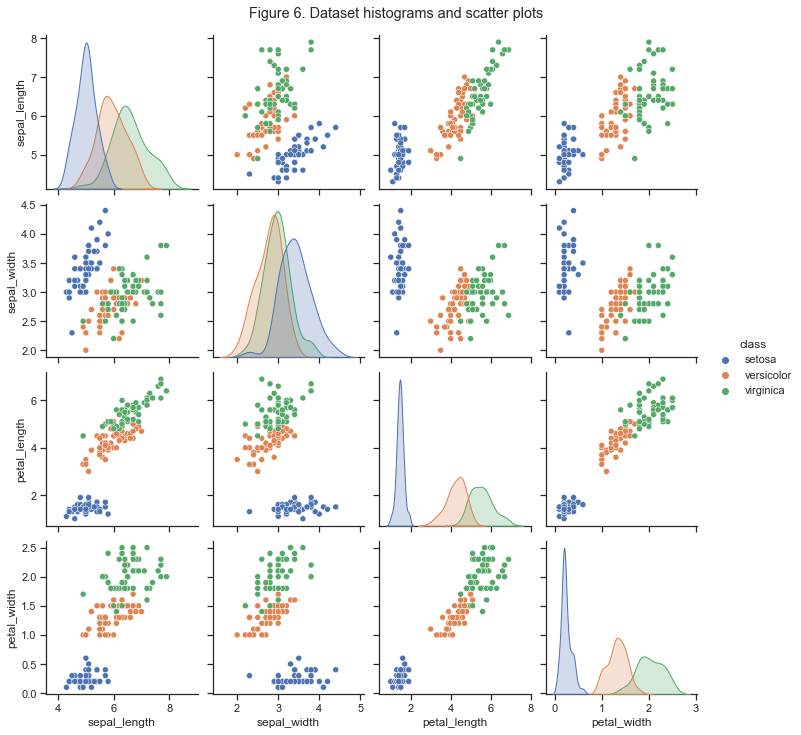

In [72]:
# Visualize the dataset
sns.pairplot(dt, hue ="class")
plt.suptitle("Figure 6. Dataset histograms and scatter plots", y=1.02)  
plt.show()

At first glance, we can see that
- the setosa class attributes are easy to separate from the versicolor and virginica class, and
- the virginica and versicolor seem to have some overlap for all the attributes.

So, the question here will be if the algorithms will be accurate enough to be able to correctly classify each of the classes or if, due to these areas where there is an overlap, the algorithms will fail in the classification.

**Data preprocessing**

In [73]:
# Check for missing values in the entire dataset
total_missing = dt.isnull().sum().sum()
print(f"Total missing values in the dataset: {total_missing}")

Total missing values in the dataset: 0


No need to drop any NaN values.

Now the dataset is ready for the two machine learning algorithms.

#### **4.1. K-NEAREST NEIGHBORS**

**Introduction**

K-Nearest Neighbors (KNN) is a crucial classification algorithm in Machine Learning, falling under the supervised learning category. It is particularly useful in pattern recognition, data mining, and intrusion detection. The strength of KNN lies in its non-parametric nature, meaning it doesn't assume any specific distribution of the data, unlike other algorithms such as Gaussian Mixture Models (GMM). It works by using existing training data to classify new data points into distinct groups based on their attributes.(13)

It is a widely-utilized and straightforward machine learning technique known for its ease of use and flexibility. Capable of processing both numerical and categorical data, KNN is a versatile tool for diverse classification and regression scenarios. Functioning as a non-parametric method, it bases its predictions on the proximity and similarity of data points within the dataset, and is comparatively less affected by outliers.(13)

In its operation, KNN identifies the K nearest data points to a target point using a specific distance measure, often Euclidean distance. It then determines the classification or value of the target point based on the most common outcome or the mean outcome among these K nearest points (Figure 7). This process allows K-NN to adjust to various data patterns, making predictions by considering the immediate data environment.(13)

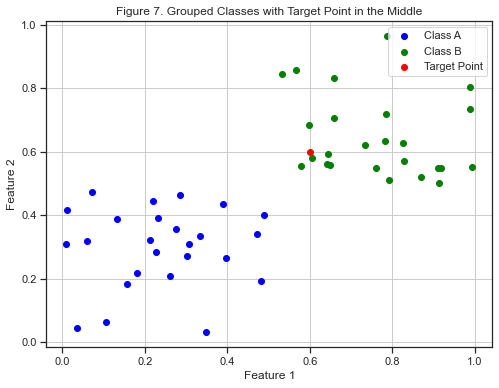

In [74]:
# Example of KNN classification

np.random.seed(0)
# Example dataset:
X_class_A = np.random.rand(25, 2) * 0.5 
X_class_B = np.random.rand(25, 2) * 0.5 + 0.5  
X_combined = np.vstack((X_class_A, X_class_B))  
y_combined = np.array(['Class A'] * 25 + ['Class B'] * 25) 

# Target point
target_point = np.array([[0.6, 0.6]])

# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_combined[y_combined == 'Class A', 0], X_combined[y_combined == 'Class A', 1], color='blue', label='Class A')
plt.scatter(X_combined[y_combined == 'Class B', 0], X_combined[y_combined == 'Class B', 1], color='green', label='Class B')
plt.scatter(target_point[:, 0], target_point[:, 1], color='red', label='Target Point')

plt.title('Figure 7. Grouped Classes with Target Point in the Middle')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

To determine how close our target point is from the closest group we use distance metrics. 

**KNN Distance metrics**

1. Euclidean distance: it is essentially the straight-line distance between two points in a plane or a higher-dimensional space (hyperplane). Measuring the length of the direct line connecting the two considered points. This metric is useful for calculating the total displacement an object undergoes between two states.(13)

In [75]:
# Euclidean distance formula
latex_code = r'd(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}'
# Displaying the formula
display(Math(latex_code))

<IPython.core.display.Math object>

p,q	= 	two points in Euclidean n-space  
q_i, p_i	= 	Euclidean vectors, starting from the origin of the space (initial point)  
n	= 	n-space

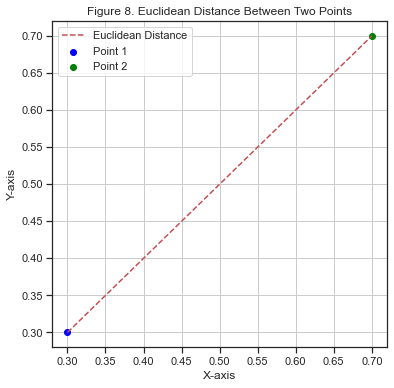

In [76]:
# Plot to represent Euclidean distance between two points

# Sample points
point1 = np.array([0.3, 0.3])
point2 = np.array([0.7, 0.7])

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(*point1, color='blue', label='Point 1')
plt.scatter(*point2, color='green', label='Point 2')

# Drawing a line
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 'r--', label='Euclidean Distance')

plt.title('Figure 8. Euclidean Distance Between Two Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


In figure 8, two points are represented, one in blue (Point 1) and the other in green (Point 2). The red dashed line between these points illustrates the Euclidean distance, which is the straight-line distance from Point 1 to Point 2. 

2. Manhattan distance: it is often used in scenarios where the total distance traveled is more relevant than the direct displacement, is calculated by summing the absolute differences between the coordinates of points in an n-dimensional space. This method measures distance as if navigating a grid-like path, rather than a straight line.(13)

In [77]:
# Manhattan distance formula
latex_code = r'd(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^{n} |p_i - q_i|'
display(Math(latex_code))

<IPython.core.display.Math object>

Where:

- P and Q are two points in the space.
- Pi and Qi are the coordinates of P and Q in the i-th dimension.
- ∣Pi−Qi∣ is the absolute difference between the coordinates of P and Q in the i-th dimension.
- The sum is taken over all dimensions n.

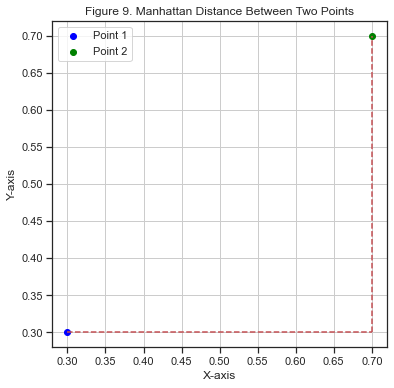

In [78]:
# Plot to represent the manhattan distance.

# Sample points for Manhattan distance
point1_manhattan = np.array([0.3, 0.3])
point2_manhattan = np.array([0.7, 0.7])

# Scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(*point1_manhattan, color='blue', label='Point 1')
plt.scatter(*point2_manhattan, color='green', label='Point 2')

# Drawing lines to represent Manhattan distance (L-shaped path)
plt.plot([point1_manhattan[0], point2_manhattan[0]], [point1_manhattan[1], point1_manhattan[1]], 'r--') 
plt.plot([point2_manhattan[0], point2_manhattan[0]], [point1_manhattan[1], point2_manhattan[1]], 'r--') 

plt.title('Figure 9. Manhattan Distance Between Two Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()


In this scatter plot, two points are shown: one in blue (Point 1) and the other in green (Point 2). The red dashed lines between these points represent the Manhattan distance. Unlike the straight-line path of the Euclidean distance, the Manhattan distance is illustrated by an L-shaped path, made up of one horizontal and one vertical line segment.

3. Minkowski distance formula: It is a general form of distance measurement that encompasses both Euclidean and Manhattan distances as its special cases.(13)

In [79]:
# Minkowski distance formula
latex_code = r'd(\mathbf{p}, \mathbf{q}) = \left( \sum_{i=1}^{n} |p_i - q_i|^p \right)^{\frac{1}{p}}'
display(Math(latex_code))

<IPython.core.display.Math object>

Where:

- x and yy are two points in an n-dimensional space, where xi and yi​ represent the coordinates of the points in the i-th dimension.
- ∣xi​−yi​∣ is the absolute difference between the coordinates of the two points in each dimension.
- p is a parameter that determines the type of distance metric:

    - When p=2, the formula becomes the Euclidean distance. In this case, the formula calculates the straight-line (direct) distance between the two points.
    - When p=1, it simplifies to the Manhattan distance, which sums the absolute differences of the coordinates.

4. Hamming distance:  It is a metric used to measure the difference between two strings or vectors of equal length. It calculates the number of positions at which the corresponding symbols or elements are different. In other words, it measures the minimum number of substitutions required to change one string or vector into the other.(8)

The choice of distance metric in the KNN algorithm significantly impacts its performance and suitability for various types of data and problems. Different distance metrics have different ways of measuring the 'closeness' of data points, and thus can lead to different results in classification or regression tasks. 

**Splitting into training and test sets**

Splitting a dataset helps in evaluating the performance of a model in a way that is independent of the data it was trained on. The process typically involves dividing the dataset into two parts:

- Training Set: This subset of the data is used to train the model. It includes both the input features and the corresponding target values. The training set is used by the machine learning algorithm to learn the relationships between the features and the target.

- Test Set: This is a separate subset used to evaluate the performance of the model. It also contains both features and targets, but these data points are not used during the training phase. The test set acts as new, unseen data for the model, providing an estimate of how well the model is likely to perform on data it hasn't encountered before.(14)

In [80]:
# Preprocess the Data, extracting the class column from the dataset.
X = dt.drop('class', axis=1)
y = dt['class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random_state: The data is randomly divided into training and test sets to ensure that the split is representative of the entire dataset. This randomness helps in preventing any bias in the model's performance due to the order or any specific structure in the data.

Test_size (Split Ratio): A common practice is to split the dataset in a specific ratio. A typical split might be 70-80% of the data for training and the remaining 20-30% for testing, but these proportions can vary depending on the size and specifics of the dataset.

**Scaling the dataset**

Scaling is a standard preprocessing step before applying KNN, ensuring that each feature contributes equally to the distance calculations and improving the overall performance and reliability of the algorithm.(15)

In the KNN algorithm is important due to the way KNN calculates the similarity (or distance) between data points. Benefits of scaling in KNN algorithm:

- Distance-Based Algorithm: KNN works by finding the closest neighbors to a query point based on a distance metric, usually Euclidean distance. This distance is sensitive to the scale of features; if one feature has a much larger range of values than others, it will dominate the distance calculation, potentially leading to biased results.
- Equal Contribution of Features: Without scaling, features with larger scales will disproportionately influence the outcome, overshadowing the contributions of features with smaller scales. Scaling ensures that each feature contributes approximately equally to the distance computation, allowing the algorithm to correctly identify the nearest neighbors based on all features.
- Improved Accuracy: Properly scaled features can lead to more accurate results in KNN. When all features are on the same scale, the distance metric reflects the true similarities between instances, allowing KNN to make more informed and accurate predictions.
- Consistency Across Datasets: Scaling ensures consistency when KNN is applied to different datasets or different subsets of the same dataset. Without scaling, the performance of KNN can be erratic and dataset-dependent.
- Handling Outliers: Scaling can also help in reducing the impact of outliers. In unscaled data, outliers can have a more significant effect on the distance calculation, potentially leading to misleading nearest neighbors.(15)(16)

In [81]:
# Standardizing the features with StandardScaler from sklearn module.(17)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Create and train the KNN model**

The value of k in the KNN algorithm determines the number of neighboring points that will be considered to classify a given query point. Selecting the right k can influence the model's tendency towards overfitting or underfitting. Smaller k values can result in high variance but low bias, making the model sensitive to the noise in the data. Conversely, larger k values might increase bias but reduce variance, leading to more generalized predictions. When dealing with data that contains outliers or noise, a larger k might yield better results. It is generally advisable to use an odd number for k to prevent tie situations in classification decisions.(8)

In [82]:
# Create and Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)

KNeighborsClassifier()

Once the data is fitted into the KNN model we can proceed with the classification model evaluation.

**KNN model evaluation**

1. Metrics for model evaluation

In the evaluation of a KNN model, or any classification model, certain metrics like precision, recall, F1-score, and support are crucial for understanding the model's performance. 

- Precision: It measures the accuracy of the positive predictions. It is defined as the number of true positive predictions divided by the total number of positive predictions (true positives + false positives).

- Recall (Sensitivity): It measures the ability of the model to find all the relevant cases within a dataset. It's defined as the number of true positives divided by the total number of actual positives (true positives + false negatives). 

- F1-Score: It is the mean of precision and recall and is a single metric that combines both. The F1-score is a useful measure when you need to balance precision and recall, particularly in cases where an uneven class distribution makes one metric more important than the other. 

- Support: It refers to the number of actual occurrences of the class in the specified dataset. For each class, it indicates how many instances of the class are present in the dataset. Support doesn't change between models but is useful for evaluating the significance of the classification report (like how many instances are there for each class to support the calculated precision and recall).

- Accuracy: It measures the performance of a classification model. It is defined as the ratio of correctly predicted observations to the total observations.

- Macro average: It computes metrics independently for each class and then takes their average, treating all classes equally regardless of their frequency in the dataset. It's particularly useful for imbalanced datasets, ensuring that each class contributes equally to the final metric.

- Weighted average: It calculates the metric for each class separately and then takes their average, weighting them by the number of instances in each class. It accounts for class imbalance by giving more weight to classes with more instances, providing a more representative overall metric when class distribution is uneven.(18,19,20,21,22)

In [83]:
# Model Evaluation
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Converting classification report to a DataFrame for better presentation
class_report_df = pd.DataFrame(class_report).transpose()

In [84]:
class_report_df

,precision,recall,f1-score,support
setosa,1.0,1.0,1.0,10.0
versicolor,1.0,1.0,1.0,9.0
virginica,1.0,1.0,1.0,11.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,30.0
weighted avg,1.0,1.0,1.0,30.0


These results indicate a well-performing model on the test data, with perfect classification for all classes.

2. Confusion matrix

A confusion matrix is a table used in classification tasks to visualize the performance of an algorithm. It shows the correct and incorrect predictions of the model compared to the actual real-world outcomes. The matrix is structured as follows:

- True Positives (TP): These are cases where the model correctly predicted the positive class.
- True Negatives (TN): These are cases where the model correctly predicted the negative class.
- False Positives (FP), also known as Type I Error: These are cases where the model incorrectly predicted the positive class.
- False Negatives (FN), also known as Type II Error: These are cases where the model incorrectly predicted the negative class.(21)

<Figure size 1152x864 with 0 Axes>

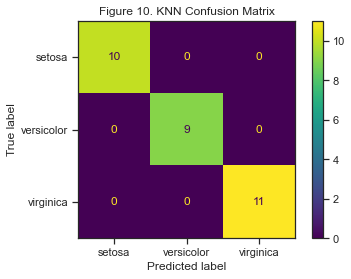

In [85]:
# Confusion Matrix
plt.figure(figsize=(16, 12))
ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_).plot(values_format='.0f')
plt.title('Figure 10. KNN Confusion Matrix')
plt.show()

The matrix shows how well the model has classified the different classes of the Iris dataset. Each cell in the matrix indicates the number of predictions for a particular class label (both true and false predictions). ​​

3. Cross-validation

Cross-validation is a statistical method used to estimate the skill of a machine learning model on unseen data. It's a way to assess how well a model will generalize to an independent dataset and it is commonly used to prevent overfitting. It works by:

- Partitioning the dataset: The dataset is divided into 'k' equal-sized subsets or 'folds'. The value of 'k' can vary, but common choices include 5 or 10.
- Model training and validation. For each fold:
    - The model is trained on the data from 'k-1' folds.
    - The remaining fold is used as a validation set to test the model.
- Iterating the process: This process is repeated 'k' times, with each of the 'k' folds used exactly once as the validation data.
- Aggregating results: The results from each fold are then averaged to produce a single estimation. This could be a mean score of accuracy, precision, recall, etc., depending on the problem and the model.

The key benefits of cross-validation include:

- More Accurate Estimate: Unlike a simple train/test split, cross-validation gives a more robust estimate of the model's performance, as it's based on multiple tests.
- Efficient Use of Data: Especially important in scenarios where the amount of data is limited, as it ensures that every data point is used for both training and testing.
- Reducing Bias: Since every data point gets to be in a validation set exactly once, and in a training set 'k-1' times, cross-validation reduces the risk of the model being tested on only 'easy' examples or being biased by the particular way the data is split.(23)

In [86]:
# Cross-validation of KNN model:

# New KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)

# Applying 5-fold cross-validation
# X and y are the features and target variable from the entire dataset
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

# Print scores
print("Cross-validation scores for each fold:", cv_scores)
 
# Mean and standard deviation of the scores
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())


Cross-validation scores for each fold: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean cross-validation score: 0.9733333333333334
Standard deviation of cross-validation scores: 0.02494438257849294


The results show:
- Cross-validation scores for each fold: The values [0.96666667, 1.0, 0.93333333, 0.96666667, 1.0] indicate the model's performance metrics (like accuracy) for each of the five folds used in this cross-validation. The scores suggest a high level of accuracy in each fold, with two folds achieving perfect scores (1.0), and the others being close to 1.
- Mean Cross-validation Score: A mean score close to 1.0 indicates that the model, on average, performs very well across all the different folds.
- Standard deviation of cross-validation scores: A lower standard deviation, as seen here, suggests that the model's performance is relatively consistent across different subsets of the data.


Overall, the results of KNN model performance indicate that the model is highly accurate and consistent across different subsets of the data. 

**Exploring other K values for better performance**

The selection of different k values in the KNN algorithm is crucial for several key reasons:

- Bias-Variance Balance: A small k can lead to overfitting (high variance), while a large kk might cause underfitting (high bias). The right k balances these aspects.
- Noise Handling: Larger k values help in reducing the impact of noise by averaging more neighbors.
- Outlier Impact: Smaller k values are more influenced by outliers, while larger k values reduce this sensitivity.
- Computational Efficiency: Though not significantly, smaller k can be slightly less computationally demanding.
- Class Imbalance: Appropriate k values can address biases in datasets with uneven class distribution.(24,25,26)

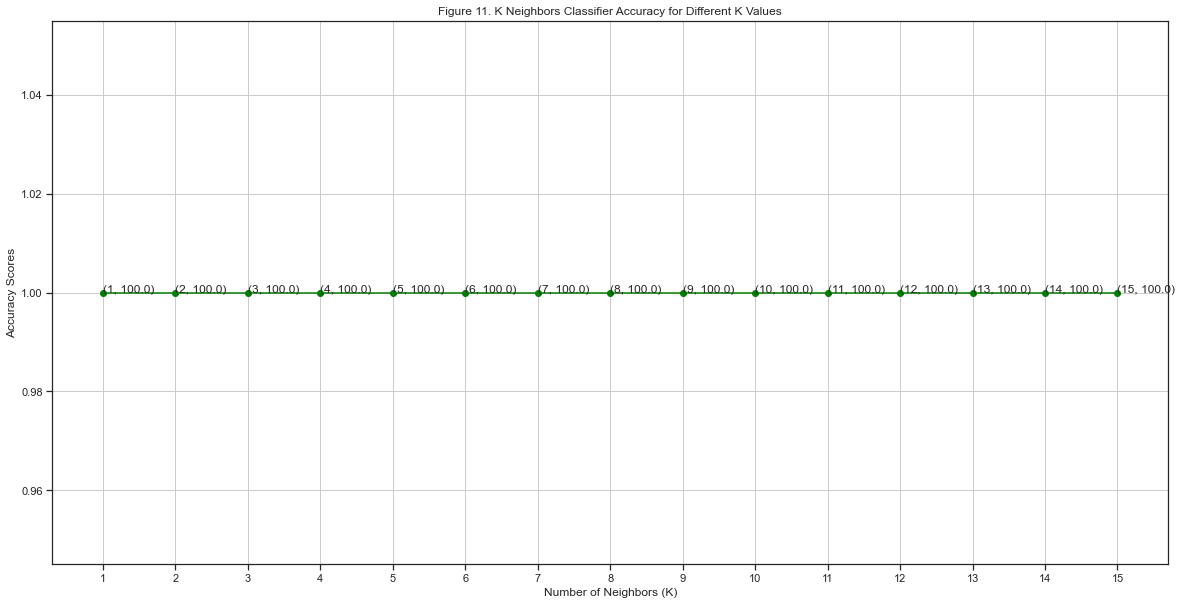

In [100]:
# Exploring other "k" values:

# List to fit k values from 1 to 15 in the KNN model
knn_values = []
for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    # Predict on the test set
    pred = knn.predict(X_test)
    a = accuracy_score(pred, y_test)
    knn_values.append(a)

# Plotting
plt.figure(figsize=(20, 10))
sns.set(style="ticks")
plt.plot([k for k in range(1, 16)], knn_values, color='green', marker='o')
for i in range(1, 16):
    plt.text(i, knn_values[i - 1], (i, round(knn_values[i - 1] * 100, 2)))
plt.xticks([i for i in range(1, 16)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Scores')
plt.title('Figure 11. K Neighbors Classifier Accuracy for Different K Values')
plt.grid(True)
plt.show()


The results show that choosing different k values have no effect on the final model accuracy. 

**Parameter Tuning**

Another way to evaluate the best performance is through parameter tuning. It allows for an exhaustive search over a specified parameter grid. For a KNN model, this means you can systematically explore a range of values for k and other parameters like the distance metric (Euclidean, Manhattan, etc.). 

Using GridSearchCV from sklearn.model_selection for parameter tuning is an efficient, and convenient tool for parameter tuning in machine learning, enabling thorough exploration of different parameter spaces. It integrates cross-validation, testing each parameter combination on different subsets of the data. This provides a more robust evaluation of the model's performance, as it reduces the risk of overfitting to a particular subset of the data and ensures that the model generalizes well to unseen data.(28)

In [88]:
# Setting the parameter grid
param_grid = {'n_neighbors': range(1, 30)}

# Using grid search to find the best K
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best K value
best_k = grid_search.best_params_['n_neighbors']

print("Optimal number of neighbors:", best_k)

Optimal number of neighbors: 3


The output 3 indicates that, according to the grid search, the best number of neighbors (n_neighbors) for this particular KNN model, given the training data and using 5-fold cross-validation, is 3. This means that the model achieved the best performance when it considered the 3 nearest neighbors to classify new data points.

In [89]:
# Best score achieved
best_score = grid_search.best_score_
best_score

0.95

The best_score_ attribute represents the highest mean cross-validated score obtained by the grid search. The output 0.95 (or 95%) indicates that the best performing model found by the grid search, using the best number of neighbors for KNN, achieved an average accuracy of 95% across the different folds of cross-validation. This means that, on average, the model correctly predicted the class of the data points 95% of the time in the validation sets used during cross-validation.

**Evaluate the performance of difference distance metrics**

Evaluating different distance metrics in the KNN algorithm is crucial for optimizing the model's performance, as each metric can impact the model differently.

In [90]:
# Evaluation of different distance metrics

# List of different distance metrics to try
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

# Dictionary to store accuracy for each metric
accuracy_scores = {}

for metric in distance_metrics:
    # KNN model with the specified metric
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    
    knn.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the dictionary
    accuracy_scores[metric] = accuracy

for metric, accuracy in accuracy_scores.items():
    print(f"Accuracy with {metric} metric: {accuracy:.2f}")


Accuracy with euclidean metric: 1.00
Accuracy with manhattan metric: 1.00
Accuracy with minkowski metric: 1.00


However, for the iris dataset, it seems that no matter the distance we choose, the model accuracy remains the same. 

**Learning curve analysis**

Learning curve analysis is a method used in machine learning to evaluate the performance of a model across varying amounts of training data. It involves plotting learning curves, which are graphs that show the relationship between the experience of the model (in terms of the amount of data it's trained on) and its performance (usually measured by accuracy or error).(28)

Learning curves can identify:

- Performance metrics: measured in terms of accuracy (for classification problems) or error rates (for regression problems).
- Overfitting and Underfitting:
    - Overfitting: If the training score is high but the validation score is low, the model is likely overfitting to the training data.
    - Underfitting: If both training and validation scores are low, the model may be underfitting, implying it's too simple to capture the underlying pattern in the data.
- Effect of training size: how the model's performance improves as the size of the training data increases.(28)

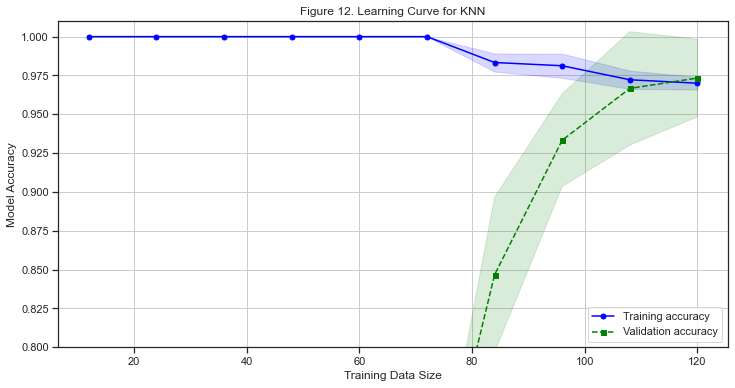

In [91]:
# Learning curve analysis

train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available processors
)

# Calculate the mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Figure 12. Learning Curve for KNN')
plt.xlabel('Training Data Size')
plt.ylabel('Model Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.01])
plt.grid()
plt.show()


Results:

- Training Accuracy: As the training data size increases, the training accuracy slightly decreases. This is typical because a model trained on a smaller dataset can easily memorize the training data, leading to higher accuracy. As the dataset grows, it becomes harder for the model to fit perfectly, causing a slight decrease in training accuracy.
- Validation Accuracy: The validation accuracy increases with the size of the training data. Initially, when the training data size is small, the model is not generalized enough, leading to lower validation accuracy. As more data is used for training, the model becomes better at generalizing to unseen data, improving its validation accuracy.

Overall, the learning curve indicates that the model benefits from more training data, as seen by the convergence of training and validation accuracy. A good balance is achieved when both accuracies are high and close to each other, suggesting that the model is neither overfitting nor underfitting.​

**KNN Limitations**

- Sensitivity to scale and outliers: KNN is sensitive to the scale of the data and outliers because it relies on the distance between data points to make classifications. 
- Dimensionality: As the number of features increases, the volume of the feature space increases exponentially, making the data sparse. This sparsity affects the performance of KNN, which is problematic for high-dimensional data.
- Computational intensity: KNN can be computationally expensive, especially with large datasets, as it involves calculating the distance of a new data point to every other point in the dataset.
- Choice of K and Distance Metric: The performance of KNN is dependent on the choice of the number of neighbors (K) and the distance metric (e.g., Euclidean, Manhattan).
- No Model Training Phase: KNN does not learn anything from the training data and essentially memorizes the entire dataset. This can be a drawback as it doesn't build an internal model.(29,30)

#### **4.2 Random Forest Model**

**Introduction**

The Random Forest (RF) algorithm operates on three key hyperparameters: node size, the number of trees, and the number of features to sample at each split.(31)

Hyperparameters:
- Node size: refers to the minimum size of the leaf nodes. Smaller node sizes allow the trees to capture more subtle patterns but can lead to overfitting.
- Number of trees: rhe total count of decision trees in the forest. More trees generally improve model performance but increase computational complexity.
- Number of features sampled: dictates how many features are considered for splitting at each node. This randomness helps in making the model more robust and less prone to overfitting.(31)

The algorithm builds a collection of decision trees. Each tree is trained on a bootstrap sample (a sample drawn with replacement) from the training data. One-third of the training data is typically set aside as out-of-bag (OOB) data for validation, not used in the tree training.(31)

Feature Bagging and Randomness: Introduces randomness through feature bagging, which involves selecting random subsets of features for building each tree. This reduces the correlation among trees and enhances model diversity.(31)

Prediction mechanism:
- In regression tasks, the algorithm averages the predictions from all trees.
- For classification, it uses a majority voting system, where the most frequent class predicted by the trees is chosen.(31)

Cross-validation using OOB Samples: The OOB samples, not used in training, serve for model validation providing an unbiased evaluation of model performance.(31)

**RF Benefits**

1. Reduced Overfitting Risk: Random Forest mitigates overfitting, common in decision trees, by averaging predictions from multiple uncorrelated trees. This lowers the overall variance and prediction error, making the model more generalizable to new data.

2. High Flexibility: Capable of handling both regression and classification tasks effectively, Random Forest is favored for its versatility. It also remains accurate when some data is missing, thanks to feature bagging, which ensures robustness against incomplete data.

3. Ease of Determining Feature Importance: The algorithm simplifies the evaluation of how much each feature contributes to the model. Common methods include Gini importance and mean decrease in impurity (MDI), which measure the impact on model accuracy when a feature is excluded. Additionally, permutation importance (or mean decrease accuracy, MDA) assesses accuracy reduction by randomly shuffling feature values in out-of-bag (OOB) samples.(31)

**RF model evaluation**

We will use the same X_train and y_train data from the Iris dataset for the RF model evaluation.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 1152x864 with 0 Axes>

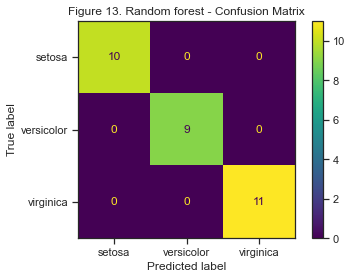

In [92]:
# Random forest model evaluation on the iris dataset.

# Creating the Random Forest model / n_estimators parameter defines the number of trees in the forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)
class_names = dt['class'].unique()


# Model evaluation
evaluation_report = classification_report(y_test, y_pred)
print(evaluation_report)

# Confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16, 12))
ConfusionMatrixDisplay(conf_matrix2, display_labels=class_names).plot(values_format='.0f')
plt.title('Figure 13. Random forest - Confusion Matrix')
plt.show()

Results:
- Classification report: These results indicate a well-performing model on the test data, with perfect classification for all classes.
- Confusion matrix: The matrix shows how well the model has classified the different classes of the Iris dataset. Each cell in the matrix indicates the number of predictions for a particular class label (both true and false predictions). ​​

**Cross-validation**

In [93]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Calculating mean and standard deviation of cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std

(0.9666666666666668, 0.02108185106778919)

Results:

Mean Accuracy: Approximately 96.67%  
Standard Deviation: Approximately 2.11%

These results suggest that the model performs quite well on the Iris dataset. The high mean accuracy indicates that, on average, the model correctly predicts the iris species about 96.67% of the time across the different folds.

The standard deviation of the cross-validation scores is about 2.11%, which is relatively low. This implies that the model's performance is consistent across different subsets of the data. 

**Hyperparameter Tuning**

Hyperparameter tuning in the Random Forest algorithm involves adjusting parameters to optimize model performance. Key hyperparameters include 

- n_estimators: This represents the number of trees in the forest. Generally, more trees increase model accuracy and stability, but up to a certain point. Beyond this point, benefits decrease and computational cost increases. 
- max_depth: The maximum depth of each tree. Deeper trees can model more complex patterns but can also lead to overfitting. Limiting the depth can prevent overfitting and reduce computation.
- criterion: specifies the function used to measure the quality of a split. The two common options for this parameter are 'gini' and 'entropy'.
    - 'gini' criterion is intended to minimize the probability of misclassification. It measures the frequency at which any element of the dataset will be mislabeled when it is randomly labeled according to the distribution of labels in the subset.
    - 'entropy' is a concept from information theory that measures the level of impurity in a group of examples. If the sample is completely homogeneous, the entropy is zero; if the sample is an equally divided mix, the entropy is one.(32,33)

Tuning these parameters can improve accuracy, prevent overfitting, and manage computational cost.

In [94]:
# Parameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth' : [4, 5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_
best_params


Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 50}

The results show the best parameters found for the model based on the range of parameters specified and the dataset used. 

'criterion': 'gini' - In this case, 'gini' indicates that the Gini impurity measure is used. Gini impurity is a commonly used metric that measures how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

'max_depth': 4 - A depth of 4 means that each decision tree in the forest can have a maximum of four levels. Limiting the depth of the trees can help prevent overfitting by not allowing the trees to become overly complex.

'n_estimators': 50 - The optimal number of trees is found to be 50. Generally, a higher number of trees in the forest can lead to better performance but also increases computational cost.

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Figure size 1152x864 with 0 Axes>

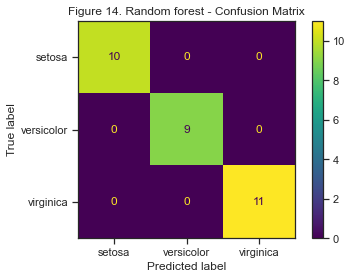

In [95]:
# Random forest model evaluation on the iris dataset with optimized parameters

# Optimal parameters
optimal_params = {
    'criterion': 'gini',
    'max_depth': 4,
    'n_estimators': 50,
    'random_state': 42  
}

# Creating the Random Forest Classifier with the optimal parameters
optimal_rf = RandomForestClassifier(**optimal_params)

optimal_rf.fit(X_train, y_train)

# Predictions
y_pred = optimal_rf.predict(X_test)
class_names = dt['class'].unique()


# Model evaluation
evaluation_report2 = classification_report(y_test, y_pred)
print(evaluation_report2)

# Confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(16, 12))
ConfusionMatrixDisplay(conf_matrix3, display_labels=class_names).plot(values_format='.0f')
plt.title('Figure 14. Random forest - Confusion Matrix')
plt.show()

Even changing the parameters to the optimal ones, the random forest model performance cannot be improved.

**Learning Curve**

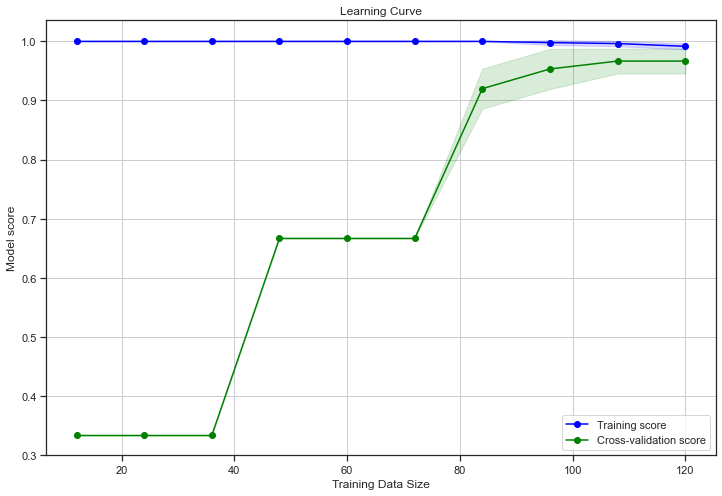

In [96]:
# Learning curve for RF model

# Define the model with the best parameters found
optimized_rf_model = RandomForestClassifier(n_estimators=50, criterion='gini', max_depth=4, random_state=42)

# Calculate the learning curve
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=optimized_rf_model,
    X=X, y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    n_jobs=-1
)

# Calculate the mean and standard deviation for training and validation sets
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plotting the learning curve
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_mean, label='Training score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.15)
plt.plot(train_sizes, validation_mean, label='Cross-validation score', color='green', marker='o')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='green', alpha=0.15)
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model score')
plt.legend(loc='best')
plt.grid()
plt.show()


Training Score:  

- This line represents the model's performance on the training dataset. As the size of the training data increases, the training score typically decreases. This is because it's easier for the model to fit to a smaller dataset, but as the dataset grows, it becomes more challenging for the model to fit perfectly to all the data points.  
- The shaded blue area represents the variability (standard deviation) of the training score, indicating the consistency of the model's performance on different subsets of the training data.  

Cross-validation Score:  

- The green line shows the model's performance on the unseen data (cross-validation set). Unlike the training score, the cross-validation score usually increases with more training data. This happens as the model learns more general patterns that are better at predicting unseen data.  
- The shaded green area shows the variability in the cross-validation score, reflecting how the model's performance on the validation set varies with different subsets of the data.  

Result:

- As the training data size increases, the two lines converge. The ideal scenario is where both training and validation scores are high and close to each other, indicating that the model is neither underfitting nor overfitting.
- Both the training and validation scores seem quite high, and they converge as more data is used. This suggests that the model is learning effectively from the training data and generalizing well to new, unseen data.

**Feature importance**

Feature importance in the context of a Random Forest classifier refers to a technique that ranks the features of your dataset based on how useful they are at predicting a target variable.(34,35,36)

In a Random Forest, feature importance is calculated based on:

- Decrease in impurity: For each tree in the forest, the algorithm calculates how much each feature decreases the impurity of a split. The impurity measure used is typically the same as the one used for splitting nodes (either Gini impurity or entropy). Features that lead to higher decreases in impurity are considered more important.
- Average over all trees: Since a Random Forest is an ensemble of trees, the feature importance scores calculated for each tree are averaged across all the trees in the forest to determine the final importance of each feature.
- Normalization: These importance scores are then normalized so that the sum of all feature importances equals 1. This makes it easier to compare the relative importance of the features.(34,35,36)

The result is a score for each feature where higher scores indicate more important features in the context of the Random Forest model. This is useful for understanding your data better, for feature selection, and for interpreting the model.(34,35,36)

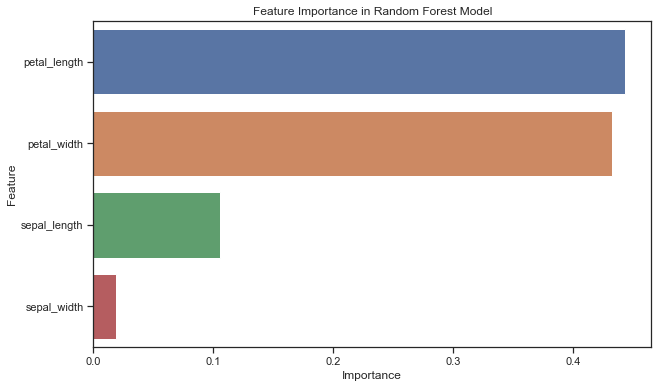

,Feature,Importance
2,petal_length,0.443027
3,petal_width,0.432450
0,sepal_length,0.105515
1,sepal_width,0.019008


In [97]:
# Train the optimized Random Forest model on the entire dataset
optimized_rf_model.fit(X, y)

# Extract feature importance
feature_importance = optimized_rf_model.feature_importances_

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sorting the DataFrame based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_df


The bar chart and the table display the importance of each feature in the optimized Random Forest model trained on the entire Iris dataset. The feature importances are derived from how much each feature contributes to improving the purity of the nodes and ultimately the decisions in the trees of the Random Forest. 

- petal_length (Approx. 44.30% Importance): this is the most important feature in predicting the iris species. It has the highest score, indicating that it contributes significantly to the model's decision-making process.
- petal_width (Approx. 43.25% Importance): very close to petal_length in terms of importance, petal_width is also a crucial feature for the model's predictions.
- sepal_length (Approx. 10.55% Importance): while not as critical as petal measurements, sepal_length still plays a notable role in the classification.
- sepal_width (Approx. 1.90% Importance): this feature has the least importance among the four. It contributes relatively little to the model's predictive ability compared to the other features.

**RF Limitations**

- Time-consuming: Random Forests are adept at managing large datasets and often yield more accurate predictions, yet their processing can be slow due to the need for computations across multiple decision trees.  
- Resource-Intensive: Handling larger datasets means Random Forests demand more resources for data storage.  
- Increased Complexity: While a single decision tree offers straightforward interpretations, the collective predictions from a Random Forest are more complex to understand.(31)

#### **4.3. Model Comparison**

KNN Model Results:

- Accuracy Consistency: The KNN model's performance was consistent across various distance metrics on the Iris dataset. This suggests that the model was stable regardless of the metric used, which is an important aspect in model reliability.
- Learning Curve Analysis: The learning curve analysis for KNN would provide insights into whether the model was overfitting or underfitting as more data was used for training. 

Random Forest Model Results:

- Overall Performance: The Random Forest model was evaluated using accuracy, classification report, and 5-fold cross-validation. These metrics provide a comprehensive view of the model's performance, not just in terms of accuracy but also in how well it generalizes across different subsets of the data.
- Feature Importance: The analysis of feature importance in the Random Forest model is a significant advantage. It offers insights into which features are most influential in making predictions, which can be crucial for understanding the model's decision-making process and for feature selection in future modeling.

Comparative Analysis:

- Stability and Accuracy: While both models were likely to have shown good performance on the Iris dataset (a relatively simple and well-behaved dataset), the Random Forest model might have had an edge in terms of handling more complex and high-dimensional data.
- Model Complexity and Interpretability: KNN is simpler and more intuitive but sensitive to the scale of data and outliers. In contrast, Random Forest is more complex and less interpretable but more robust to outliers and capable of handling higher dimensionality.
- Computational Efficiency: KNN's simplicity can be computationally efficient for smaller datasets, but it becomes resource-intensive as data size grows. Random Forest, while generally more computationally demanding, is better suited for larger, more complex datasets.
- Generalization: Random Forest's use of multiple trees reduces the risk of overfitting, likely making it better at generalizing to new data compared to KNN, especially if the latter wasn't fine-tuned for parameters like the number of neighbors or distance metric.

### **5. Conclusion**

The project focused on applying and comparing two widely used machine learning algorithms, KNN (K-Nearest Neighbors) and Random Forest, on the Iris dataset.

The KNN model, known for its simplicity and effectiveness in classification tasks, showed consistent accuracy across various distance metrics. Learning curve analysis was conducted to evaluate its performance with different training data sizes. The Random Forest model was evaluated for its ability to handle larger, more complex datasets. It included an assessment of feature importance, which provides insights into the factors most influential in making predictions. Both models were analyzed in terms of accuracy, computational efficiency, and generalization ability. 

This project highlights the importance of choosing the right algorithm based on the dataset and the specific requirements of the task. While KNN offers simplicity and is effective for smaller, less complex datasets, Random Forest excels in handling larger datasets and provides a deeper understanding through feature importance analysis.

### **6. References**

1.	Supervised learning. https://www.ibm.com/topics/supervised-learning  
2.	Supervised learning tutorial. https://thedatascientist.com/supervised-learning-machine-learning-tutorial/  
3.	Advantajes and disadvantajes https://limbd.org/supervised-machine-learning-types-advantages-and-disadvantages-of-supervised-learning/  
4.	https://www.geeksforgeeks.org/understanding-logistic-regression/  
5.	https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python  
6.	https://www.ibm.com/topics/decision-trees  
7.	https://www.ibm.com/topics/random-forest  
8.	https://www.ibm.com/topics/knn  
9.	https://www.geeksforgeeks.org/support-vector-machine-algorithm/  
10.	https://machinelearninggeek.com/naive-bayes-classification-using-scikit-learn/  
11.	https://www.ibm.com/topics/neural-networks  
12.	https://wiki.pathmind.com/neural-network  
13.	https://www.geeksforgeeks.org/k-nearest-neighbours/  
14.	https://www.geeksforgeeks.org/splitting-data-for-machine-learning-models/  
15.	https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35  
16.	https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html  
17.	https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
18.	https://www.edlitera.com/en/blog/posts/evaluating-classification-models  
19.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html  
20.	https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_algorithms_performance_metrics.htm  
21.	https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall  
22.	https://towardsdatascience.com/micro-macro-weighted-averages-of-f1-score-clearly-explained-b603420b292f  
23.	https://www.geeksforgeeks.org/cross-validation-machine-learning/  
24.	https://towardsdatascience.com/why-does-increasing-k-decrease-variance-in-knn-9ed6de2f5061  
25.	https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229  
26.	https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/  
27.	https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html  
28.	https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/  
29.	https://www.mygreatlearning.com/blog/knn-algorithm-introduction/  
30.	https://learn.g2.com/k-nearest-neighbor  
31.	https://www.ibm.com/topics/random-forest  
32.	https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74  
33.	https://quantdare.com/decision-trees-gini-vs-entropy/  
34.	https://forecastegy.com/posts/feature-importance-in-random-forests/  
35.	https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html  
36.	https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f  